In [1]:
import pandas as pd

# Load data
respondents = pd.read_csv('dim_repondents.csv')
cities = pd.read_csv('dim_cities.csv')
survey_responses = pd.read_csv('fact_survey_responses.csv')

In [2]:
print(respondents)

      Respondent_ID               Name    Age  Gender City_ID
0            120031     Aniruddh Issac  15-18  Female   CT117
1            120032        Trisha Rout  19-30    Male   CT118
2            120033       Yuvraj  Virk  15-18    Male   CT116
3            120034       Pranay Chand  31-45  Female   CT113
4            120035     Mohanlal Joshi  19-30  Female   CT120
...             ...                ...    ...     ...     ...
9995         130026         Arnav Kale  31-45    Male   CT112
9996         130027    Yuvraj  Agrawal  15-18    Male   CT113
9997         130028  Vardaniya Chauhan  31-45    Male   CT114
9998         130029        Jayan Goyal  19-30    Male   CT113
9999         130030         Piya Varty  15-18    Male   CT112

[10000 rows x 5 columns]


In [3]:
print(cities)

  City_ID       City    Tier
0   CT111      Delhi  Tier 1
1   CT112     Mumbai  Tier 1
2   CT113  Bangalore  Tier 1
3   CT114    Chennai  Tier 1
4   CT115    Kolkata  Tier 2
5   CT116  Hyderabad  Tier 1
6   CT117  Ahmedabad  Tier 2
7   CT118       Pune  Tier 2
8   CT119     Jaipur  Tier 2
9   CT120    Lucknow  Tier 2


In [4]:
respondents.columns

Index(['Respondent_ID', 'Name', 'Age', 'Gender', 'City_ID'], dtype='object')

In [5]:
respondents.isnull().sum()

Respondent_ID    0
Name             0
Age              0
Gender           0
City_ID          0
dtype: int64

In [6]:
survey_responses.columns

Index(['Response_ID', 'Respondent_ID', 'Consume_frequency', 'Consume_time',
       'Consume_reason', 'Heard_before', 'Brand_perception',
       'General_perception', 'Tried_before', 'Taste_experience',
       'Reasons_preventing_trying', 'Current_brands',
       'Reasons_for_choosing_brands', 'Improvements_desired',
       'Ingredients_expected', 'Health_concerns',
       'Interest_in_natural_or_organic', 'Marketing_channels',
       'Packaging_preference', 'Limited_edition_packaging', 'Price_range',
       'Purchase_location', 'Typical_consumption_situations'],
      dtype='object')

In [7]:
survey_responses.isnull().sum()

Response_ID                       0
Respondent_ID                     0
Consume_frequency                 0
Consume_time                      0
Consume_reason                    0
Heard_before                      0
Brand_perception                  0
General_perception                0
Tried_before                      0
Taste_experience                  0
Reasons_preventing_trying         0
Current_brands                    0
Reasons_for_choosing_brands       0
Improvements_desired              0
Ingredients_expected              0
Health_concerns                   0
Interest_in_natural_or_organic    0
Marketing_channels                0
Packaging_preference              0
Limited_edition_packaging         0
Price_range                       0
Purchase_location                 0
Typical_consumption_situations    0
dtype: int64

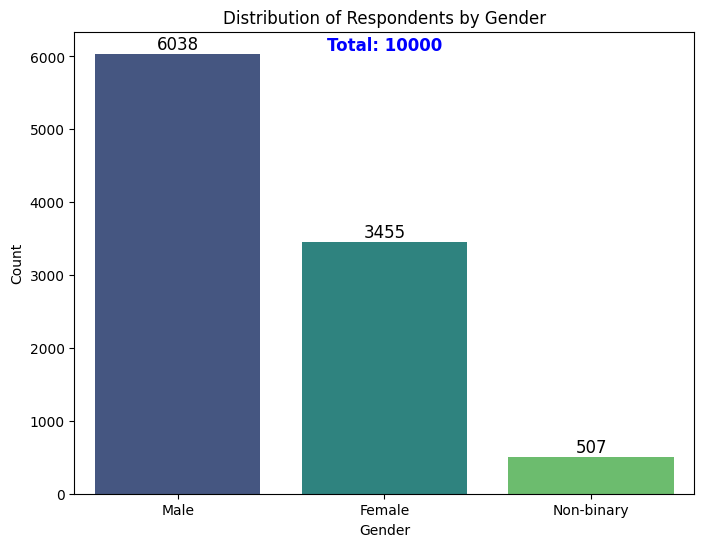

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the count of respondents by gender
gender_counts = respondents['Gender'].value_counts()

# Calculate the total number of respondents
total_respondents = gender_counts.sum()

# Plotting the distribution of respondents by gender
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')

# Annotate each bar with the count of respondents
for i, count in enumerate(gender_counts.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=12)

# Add a text annotation for the total number of respondents
plt.text(1, max(gender_counts) + 50, f"Total: {total_respondents}", ha='center', fontsize=12, fontweight='bold', color='blue')

plt.title('Distribution of Respondents by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

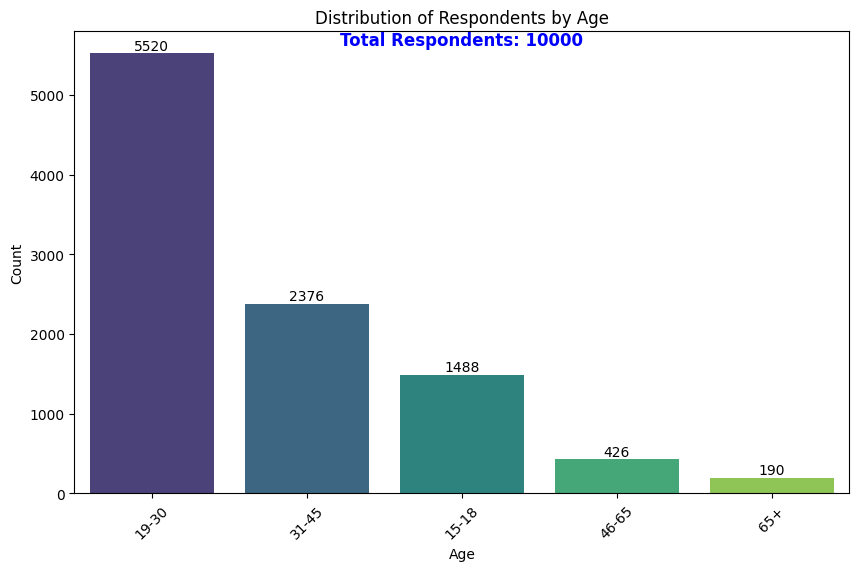

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the count of respondents by age
age_counts = respondents['Age'].value_counts()

# Calculate the total number of respondents
total_respondents = age_counts.sum()

# Plotting the distribution of respondents by age
plt.figure(figsize=(10, 6))
sns.barplot(x=age_counts.index, y=age_counts.values, palette='viridis')

# Annotate each bar with the count of respondents
for i, count in enumerate(age_counts.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10)

# Add a text annotation for the total number of respondents
plt.text(len(age_counts) // 2, max(age_counts) + 100, f"Total Respondents: {total_respondents}",
         ha='center', fontsize=12, fontweight='bold', color='blue')

plt.title('Distribution of Respondents by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

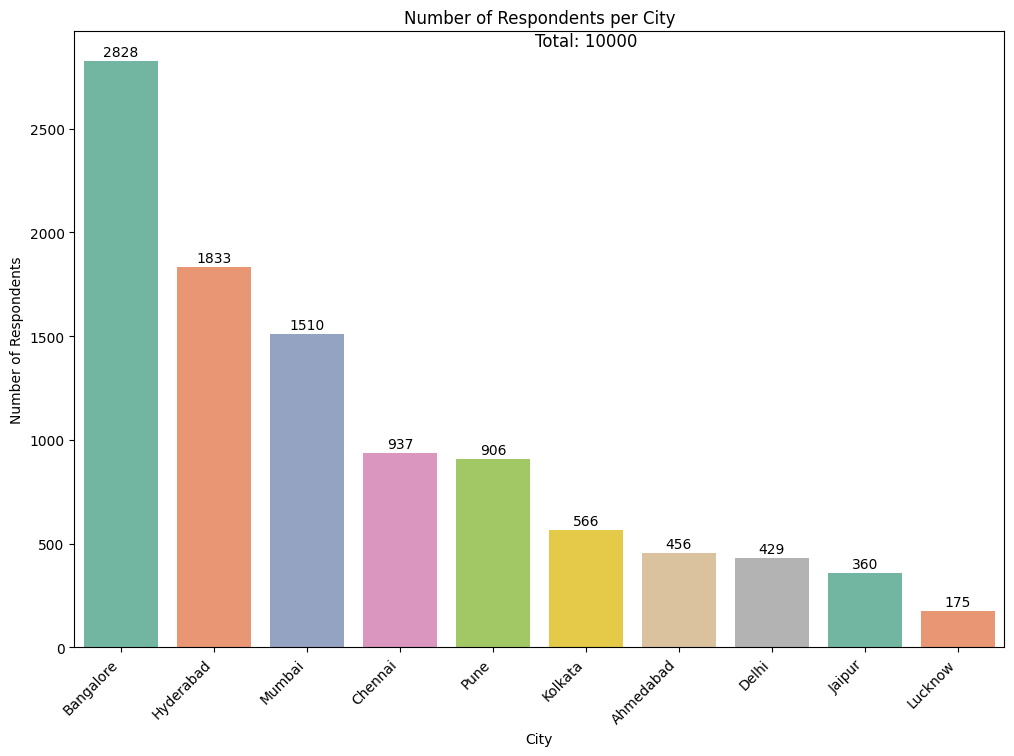

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Merge respondents DataFrame with cities DataFrame on 'City_ID'
merged_data = pd.merge(respondents, cities, on='City_ID', how='left')

# Calculate respondent counts per city
city_counts = merged_data['City'].value_counts()

# Calculate the total number of respondents
total_respondents = city_counts.sum()

# Plotting the distribution of respondents by city
plt.figure(figsize=(12, 8))
sns.barplot(x=city_counts.index, y=city_counts.values, palette='Set2')

# Annotate each bar with the count of respondents
for i, count in enumerate(city_counts.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10)

# Annotate the total number of respondents at the top of the plot
plt.text(len(city_counts) / 2, max(city_counts.values) + 50, f'Total: {total_respondents}', ha='center', va='bottom', fontsize=12)

plt.title('Number of Respondents per City')
plt.xlabel('City')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.show()

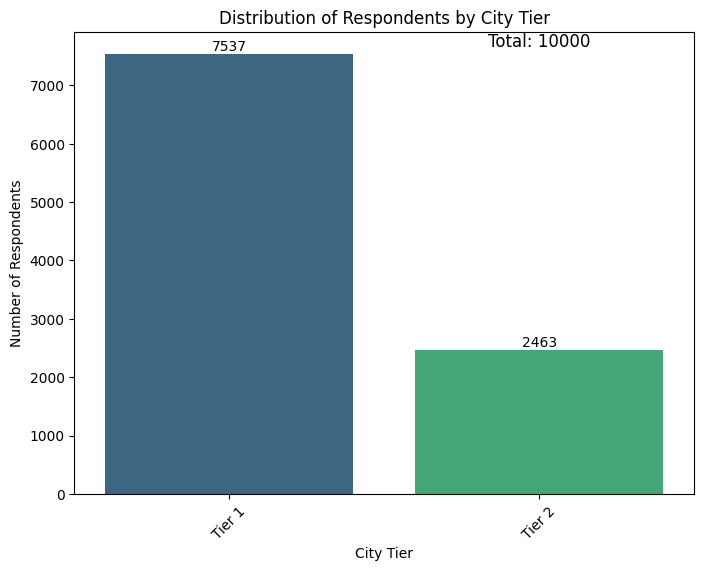

In [73]:
# Merge respondents DataFrame with cities DataFrame on 'City_ID'
merged_data = pd.merge(respondents, cities, on='City_ID', how='left')

# Calculate respondent counts by city tier
tier_counts = merged_data['Tier'].value_counts()

# Calculate the total number of respondents
total_respondents = tier_counts.sum()

# Plotting the distribution of respondents by city tier
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=tier_counts.index, y=tier_counts.values, palette='viridis')

# Annotate each bar with the count of respondents
for i, count in enumerate(tier_counts.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10)

# Annotate the total number of respondents at the top of the plot
plt.text(len(tier_counts) / 2, max(tier_counts.values) + 50, f'Total: {total_respondents}', ha='center', va='bottom', fontsize=12)

plt.title('Distribution of Respondents by City Tier')
plt.xlabel('City Tier')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

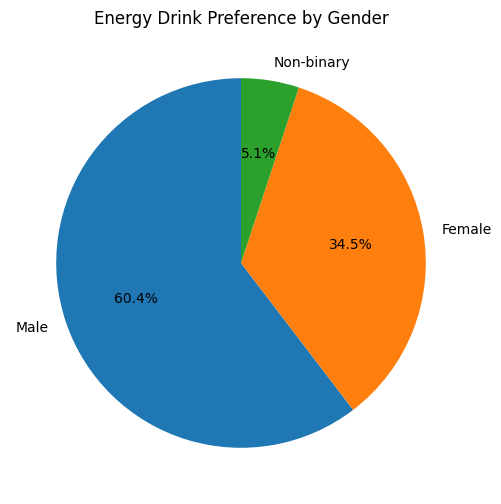

In [23]:
# Calculate distribution of energy drink preference by gender
gender_preference = merged_data['Gender'].value_counts(normalize=True)

# Visualize distribution using a pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_preference, labels=gender_preference.index, autopct='%1.1f%%', startangle=90)
plt.title('Energy Drink Preference by Gender')
plt.show()


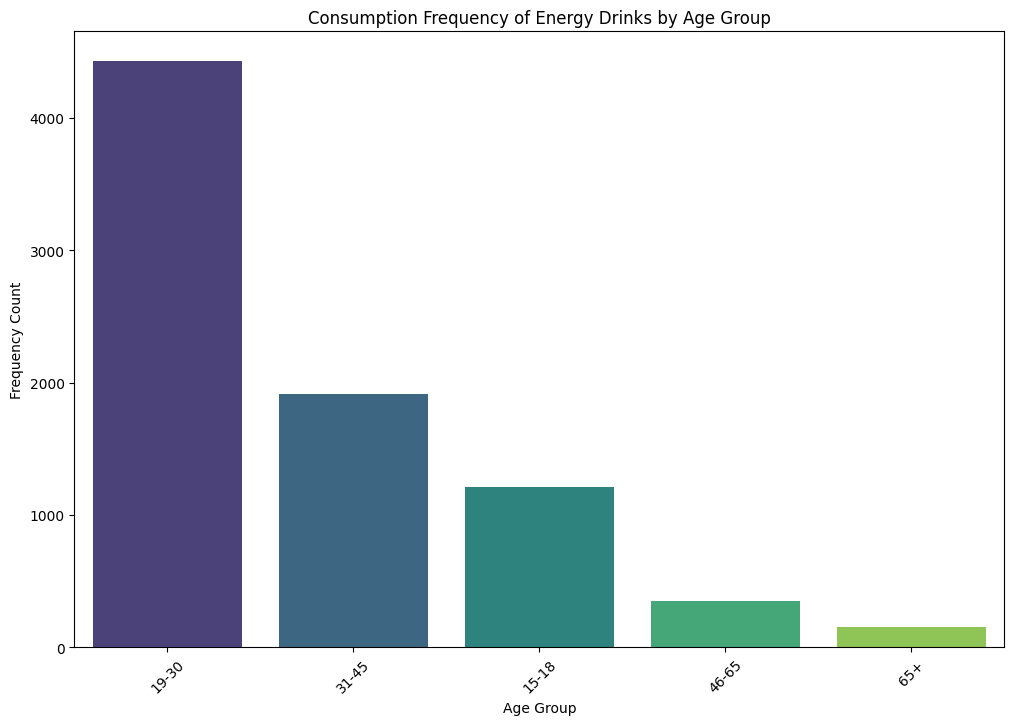

In [75]:
# Merge datasets based on 'Respondent_ID'
merged_data = pd.merge(respondents, survey_responses, on='Respondent_ID')

# Filter out rows where respondents prefer energy drinks (excluding 'Rarely' category)
energy_drink_consumers = merged_data[merged_data['Consume_frequency'] != 'Rarely']

# Group by 'Age_Group' and count the occurrences of each frequency category
age_group_consumption_counts = energy_drink_consumers['Age'].value_counts()

# Plotting the distribution of consumption frequencies by age group
plt.figure(figsize=(12, 8))
sns.barplot(x=age_group_consumption_counts.index, y=age_group_consumption_counts.values, palette='viridis')
plt.title('Consumption Frequency of Energy Drinks by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency Count')
plt.xticks(rotation=45)
plt.show()


Consumption Frequency Counts by Age Group:
Consume_frequency  2-3 times a month  2-3 times a week  Daily  Once a week
Age                                                                       
15-18                            232               539    196          244
19-30                            891              1917    736          888
31-45                            398               809    348          361
46-65                             66               155     42           86
65+                               26                71     24           30


<Figure size 1200x800 with 0 Axes>

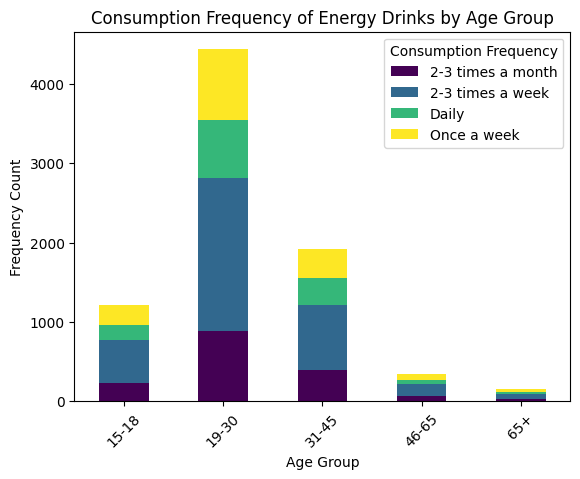

In [33]:
# Merge datasets based on 'Respondent_ID'
merged_data = pd.merge(respondents, survey_responses, on='Respondent_ID')

# Filter out rows where respondents prefer energy drinks (excluding 'Rarely' category)
energy_drink_consumers = merged_data[merged_data['Consume_frequency'] != 'Rarely']

# Group by 'Age_Group' and count the occurrences of each frequency category
age_group_consumption_counts = energy_drink_consumers.groupby('Age')['Consume_frequency'].value_counts().unstack()

# Print the counts of each consumption frequency category for each age group
print("Consumption Frequency Counts by Age Group:")
print(age_group_consumption_counts)

# Plotting the distribution of consumption frequencies by age group
plt.figure(figsize=(12, 8))
age_group_consumption_counts.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Consumption Frequency of Energy Drinks by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency Count')
plt.xticks(rotation=45)
plt.legend(title='Consumption Frequency')
plt.show()


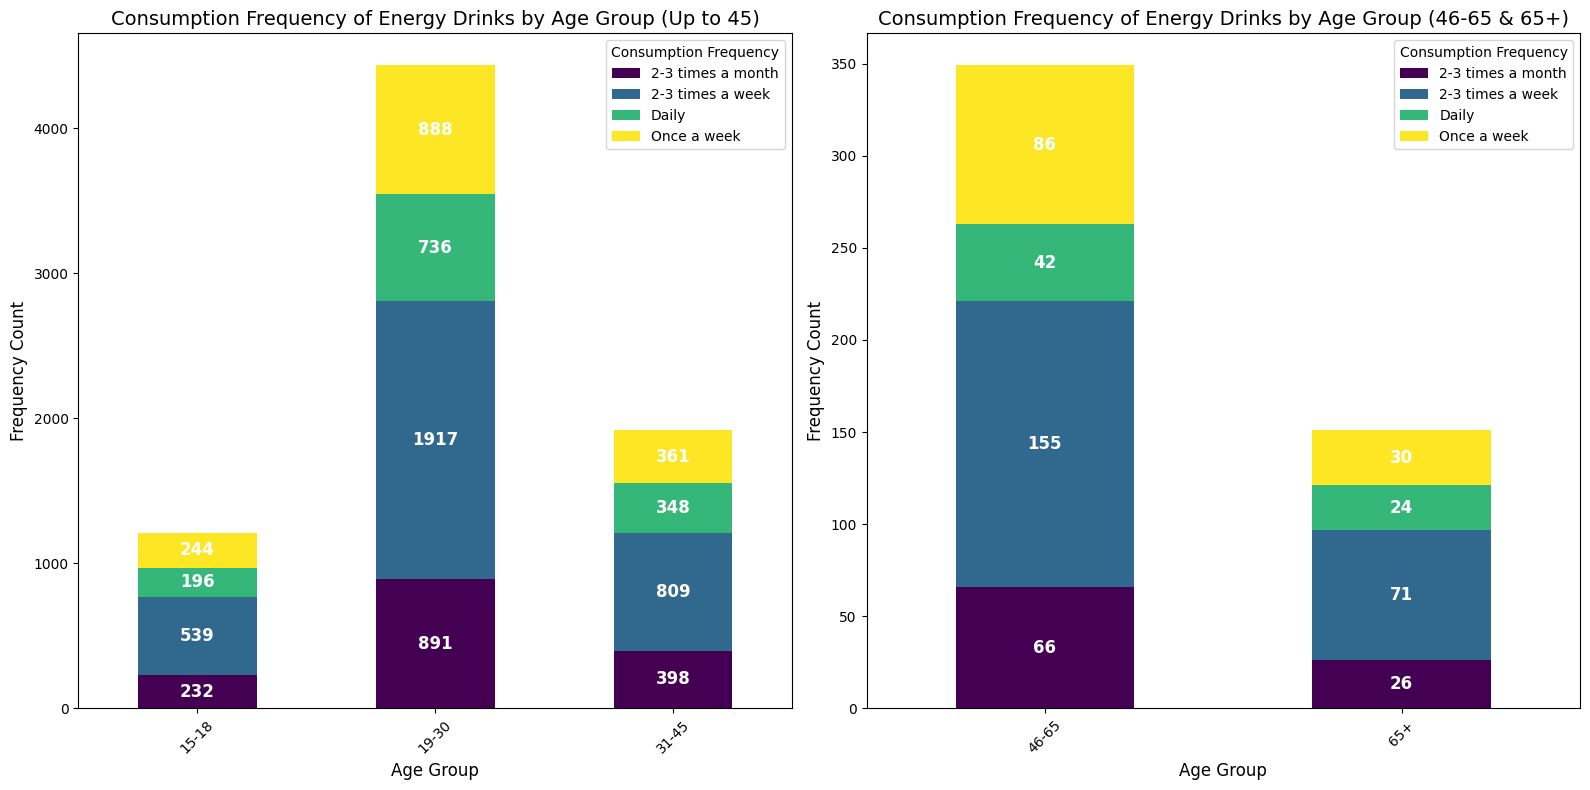

In [43]:
# Merge datasets based on 'Respondent_ID'
merged_data = pd.merge(respondents, survey_responses, on='Respondent_ID')

# Filter out rows where respondents prefer energy drinks (excluding 'Rarely' category)
energy_drink_consumers = merged_data[merged_data['Consume_frequency'] != 'Rarely']

# Group by 'Age_Group' and count the occurrences of each frequency category
age_group_consumption_counts = energy_drink_consumers.groupby('Age')['Consume_frequency'].value_counts().unstack()

# Create subplots with two axes (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plotting the distribution of consumption frequencies by age group (up to 45)
age_group_counts_subset = age_group_consumption_counts.loc[:'45']
age_group_counts_subset.plot(kind='bar', stacked=True, cmap='viridis', ax=axs[0])
axs[0].set_title('Consumption Frequency of Energy Drinks by Age Group (Up to 45)', fontsize=14)
axs[0].set_xlabel('Age Group', fontsize=12)
axs[0].set_ylabel('Frequency Count', fontsize=12)
axs[0].tick_params(axis='x', rotation=45)
axs[0].legend(title='Consumption Frequency')

# Plotting the distribution of consumption frequencies by age group (46-65 & 65+)
selected_age_groups = ['46-65', '65+']
selected_age_group_counts = age_group_consumption_counts.loc[selected_age_groups]
selected_age_group_counts.plot(kind='bar', stacked=True, cmap='viridis', ax=axs[1])
axs[1].set_title('Consumption Frequency of Energy Drinks by Age Group (46-65 & 65+)', fontsize=14)
axs[1].set_xlabel('Age Group', fontsize=12)
axs[1].set_ylabel('Frequency Count', fontsize=12)
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend(title='Consumption Frequency')

# Annotate the bars with count values for the second plot
for ax in axs:
    for p in ax.patches:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() / 2
        value = int(p.get_height())
        ax.annotate(f'{value}', (x, y), ha='center', va='center', color='white', fontsize=12, fontweight='bold')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


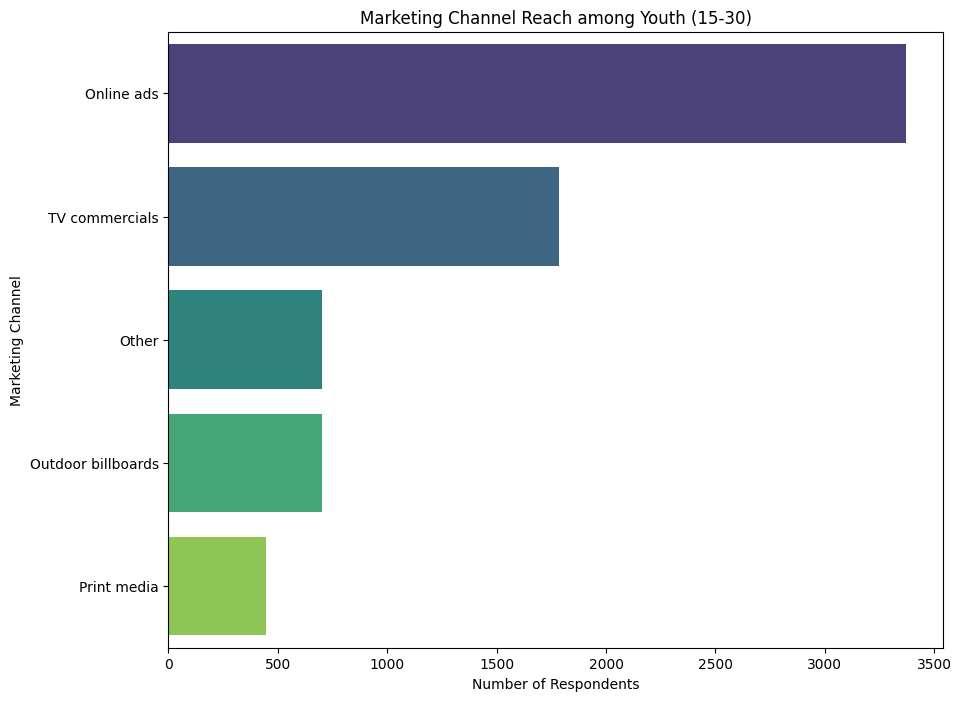

In [44]:
# Filter respondents within the Youth age group (15-30)
youth_respondents = merged_data[merged_data['Age'].isin(['15-18', '19-30'])]

# Calculate marketing channel reach among Youth
marketing_reach_youth = youth_respondents['Marketing_channels'].value_counts()

# Visualize marketing reach using a horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=marketing_reach_youth.values, y=marketing_reach_youth.index, palette='viridis')
plt.title('Marketing Channel Reach among Youth (15-30)')
plt.xlabel('Number of Respondents')
plt.ylabel('Marketing Channel')
plt.show()


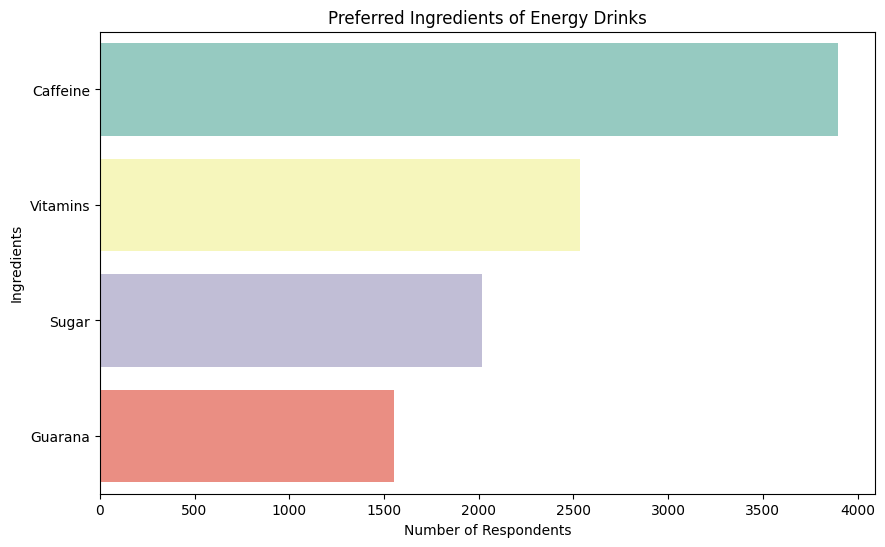

In [45]:
# Extract and count preferred ingredients
preferred_ingredients = merged_data['Ingredients_expected'].str.split(', ', expand=True).stack().value_counts()

# Visualize preferred ingredients using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=preferred_ingredients.values, y=preferred_ingredients.index, palette='Set3')
plt.title('Preferred Ingredients of Energy Drinks')
plt.xlabel('Number of Respondents')
plt.ylabel('Ingredients')
plt.show()


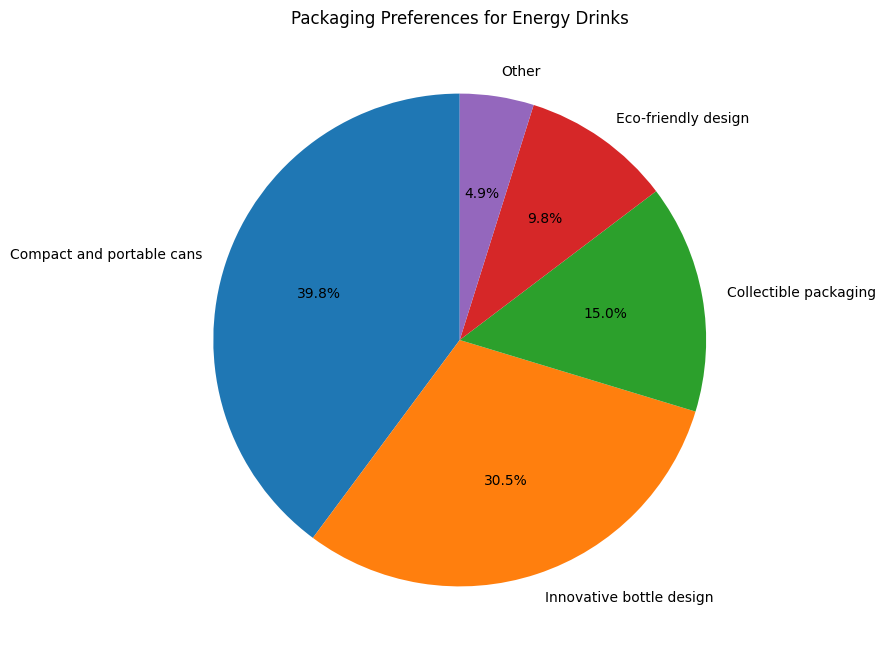

In [46]:
# Calculate packaging preferences
packaging_preferences = merged_data['Packaging_preference'].value_counts()

# Visualize packaging preferences using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(packaging_preferences, labels=packaging_preferences.index, autopct='%1.1f%%', startangle=90)
plt.title('Packaging Preferences for Energy Drinks')
plt.show()


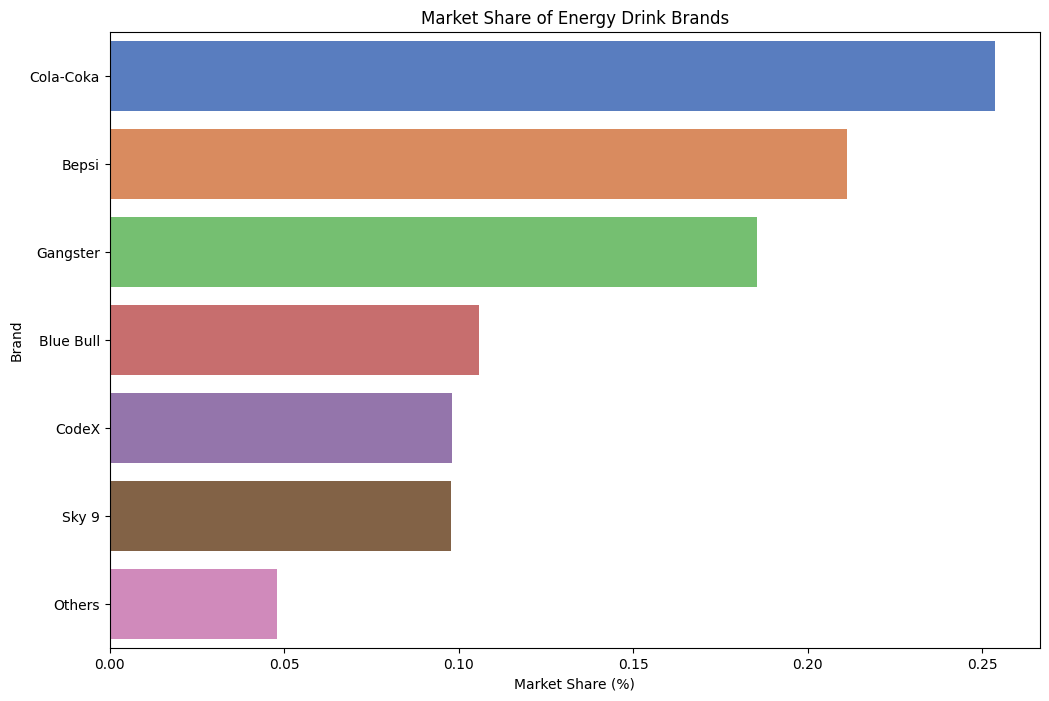

In [47]:
# Calculate market share of energy drink brands
brand_market_share = merged_data['Current_brands'].value_counts(normalize=True)

# Visualize market share using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=brand_market_share.values, y=brand_market_share.index, palette='muted')
plt.title('Market Share of Energy Drink Brands')
plt.xlabel('Market Share (%)')
plt.ylabel('Brand')
plt.show()


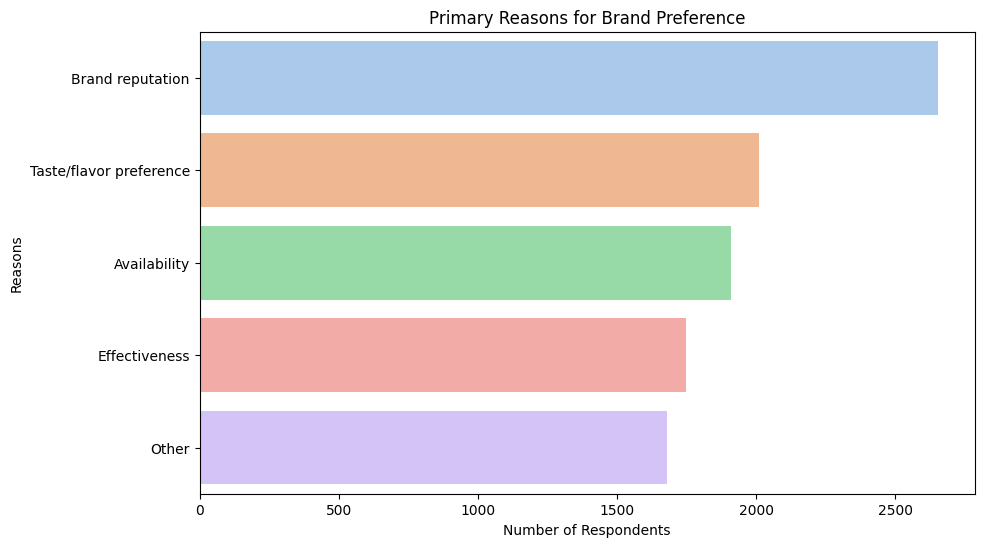

In [48]:
# Extract and count primary reasons for brand preference
brand_preference_reasons = merged_data['Reasons_for_choosing_brands'].str.split(', ', expand=True).stack().value_counts()

# Visualize reasons for brand preference using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_preference_reasons.values, y=brand_preference_reasons.index, palette='pastel')
plt.title('Primary Reasons for Brand Preference')
plt.xlabel('Number of Respondents')
plt.ylabel('Reasons')
plt.show()


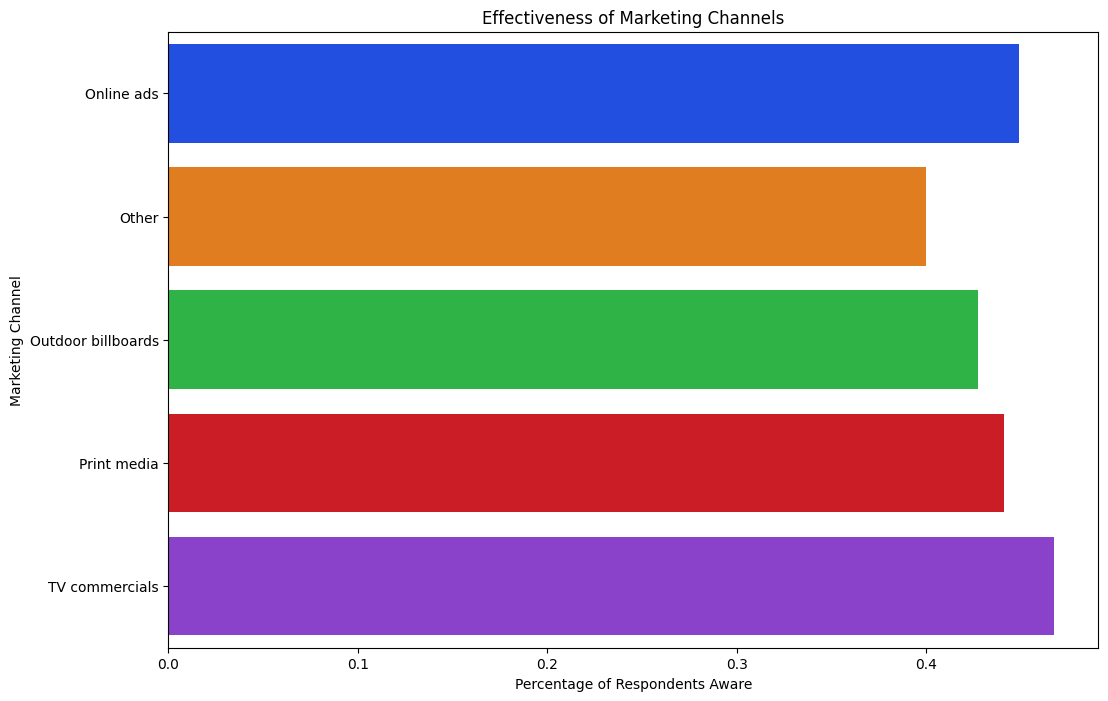

In [49]:
# Calculate effectiveness of marketing channels
marketing_channel_effectiveness = merged_data.groupby('Marketing_channels')['Heard_before'].apply(lambda x: (x == 'Yes').sum() / len(x))

# Visualize marketing channel effectiveness using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=marketing_channel_effectiveness.values, y=marketing_channel_effectiveness.index, palette='bright')
plt.title('Effectiveness of Marketing Channels')
plt.xlabel('Percentage of Respondents Aware')
plt.ylabel('Marketing Channel')
plt.show()


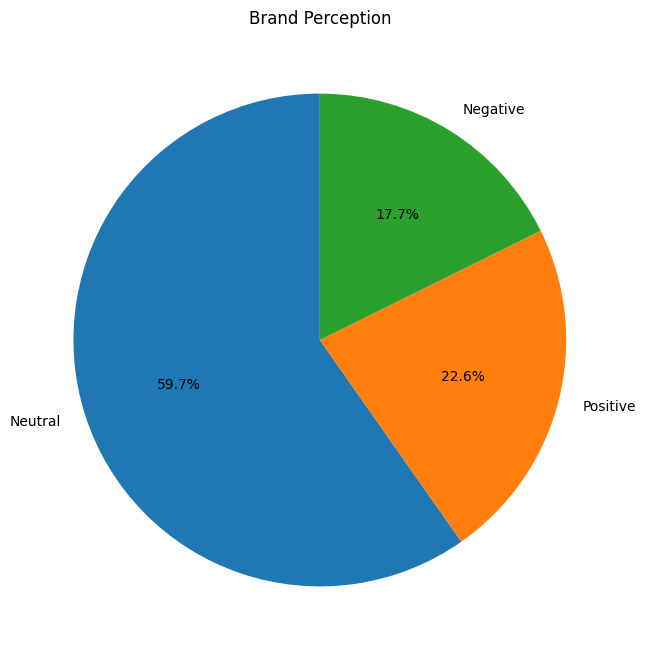

In [54]:
# Calculate brand perception ratings
brand_perception = merged_data['Brand_perception'].value_counts(normalize=True)

# Visualize brand perception using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(brand_perception, labels=brand_perception.index, autopct='%1.1f%%', startangle=90)
plt.title('Brand Perception')
plt.show()


In [51]:
# Calculate overall rating of the CodeX brand
codex_rating = merged_data[merged_data['Current_brands'] == 'CodeX']['Taste_experience'].mean()

print(f"Overall Rating of CodeX brand: {codex_rating:.2f}")


Overall Rating of CodeX brand: 3.27


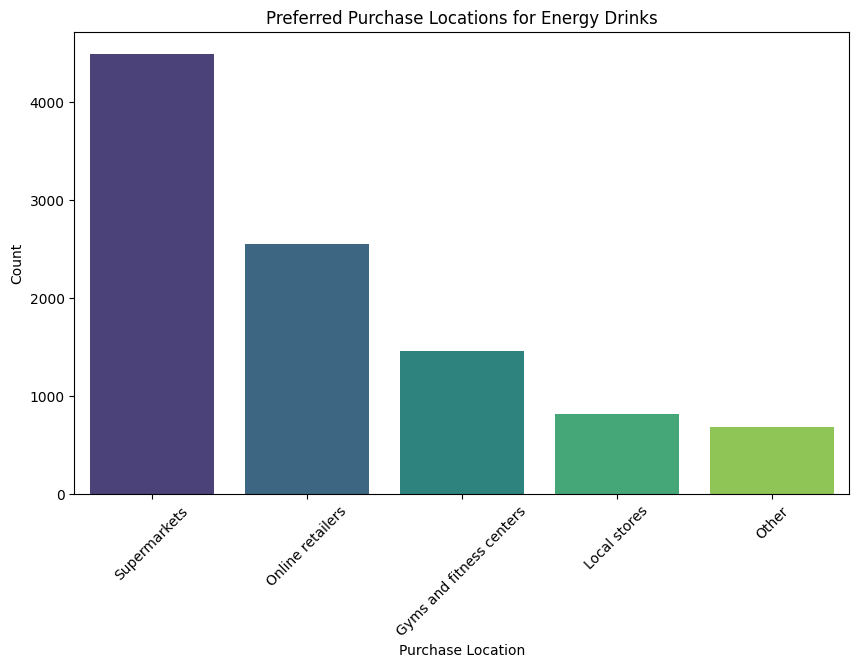

In [57]:
# Calculate purchase locations counts
purchase_location_counts = merged_data['Purchase_location'].value_counts()

# Visualize purchase locations
plt.figure(figsize=(10, 6))
sns.barplot(x=purchase_location_counts.index, y=purchase_location_counts.values, palette='viridis')
plt.title('Preferred Purchase Locations for Energy Drinks')
plt.xlabel('Purchase Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


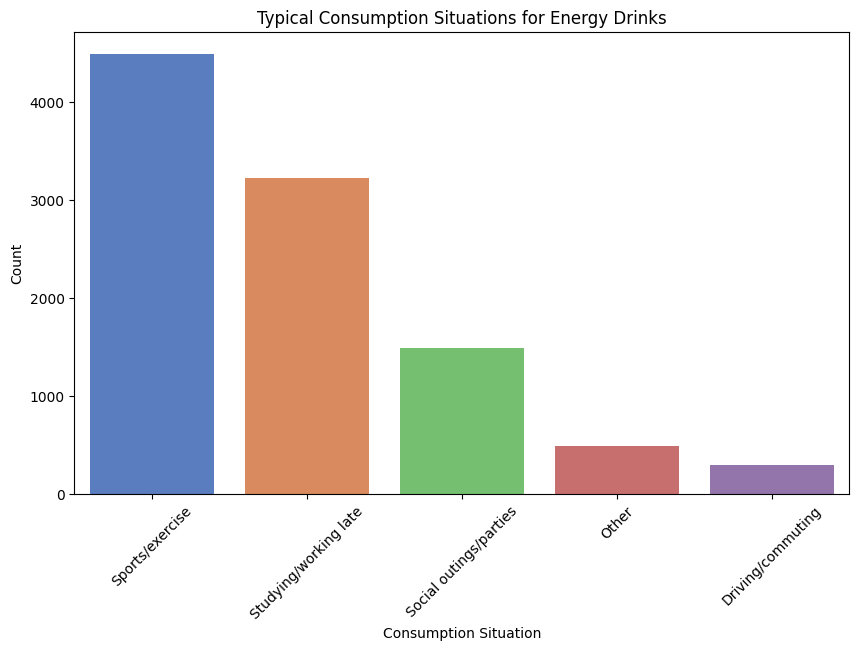

In [56]:
# Calculate consumption situations counts
consumption_situation_counts = merged_data['Typical_consumption_situations'].value_counts()

# Visualize consumption situations
plt.figure(figsize=(10, 6))
sns.barplot(x=consumption_situation_counts.index, y=consumption_situation_counts.values, palette='muted')
plt.title('Typical Consumption Situations for Energy Drinks')
plt.xlabel('Consumption Situation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


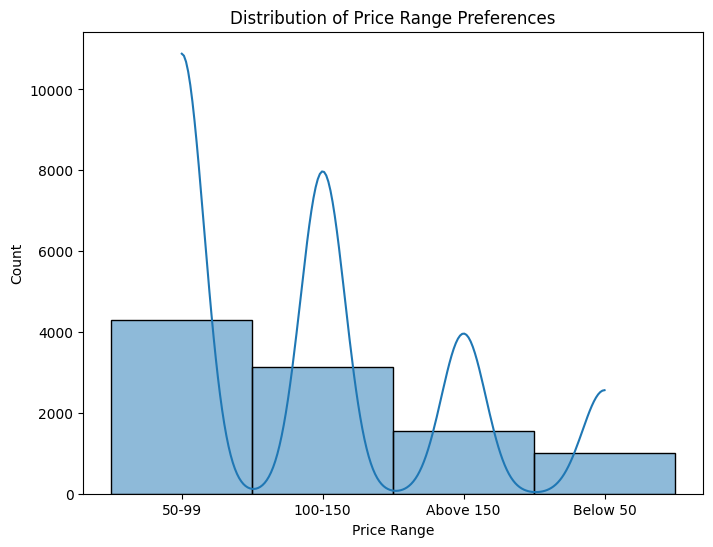

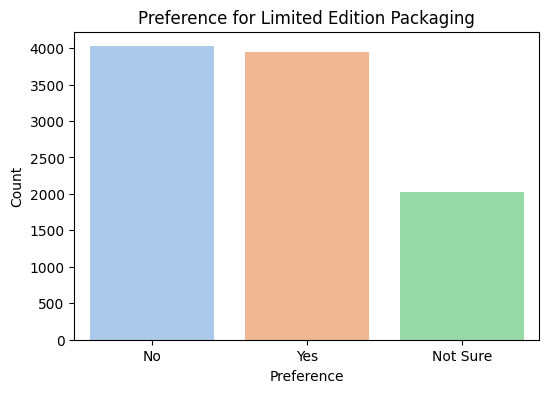

In [59]:
plt.figure(figsize=(8, 6))
sns.histplot(data=merged_data, x='Price_range', kde=True)
plt.title('Distribution of Price Range Preferences')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

limited_edition_counts = merged_data['Limited_edition_packaging'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=limited_edition_counts.index, y=limited_edition_counts.values, palette='pastel')
plt.title('Preference for Limited Edition Packaging')
plt.xlabel('Preference')
plt.ylabel('Count')
plt.show()


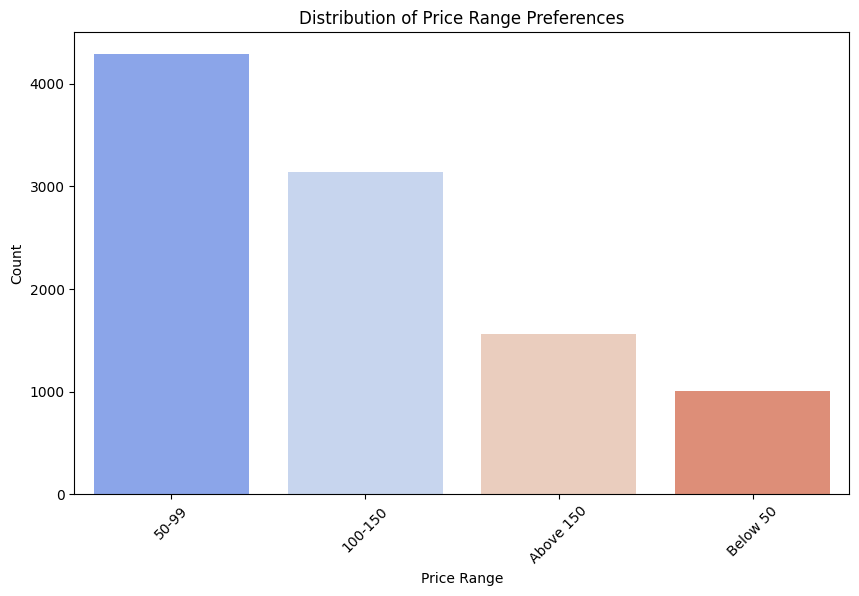

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate price range preferences
price_range_counts = survey_responses['Price_range'].value_counts()

# Visualize distribution of price range preferences
plt.figure(figsize=(10, 6))
sns.barplot(x=price_range_counts.index, y=price_range_counts.values, palette='coolwarm')
plt.title('Distribution of Price Range Preferences')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


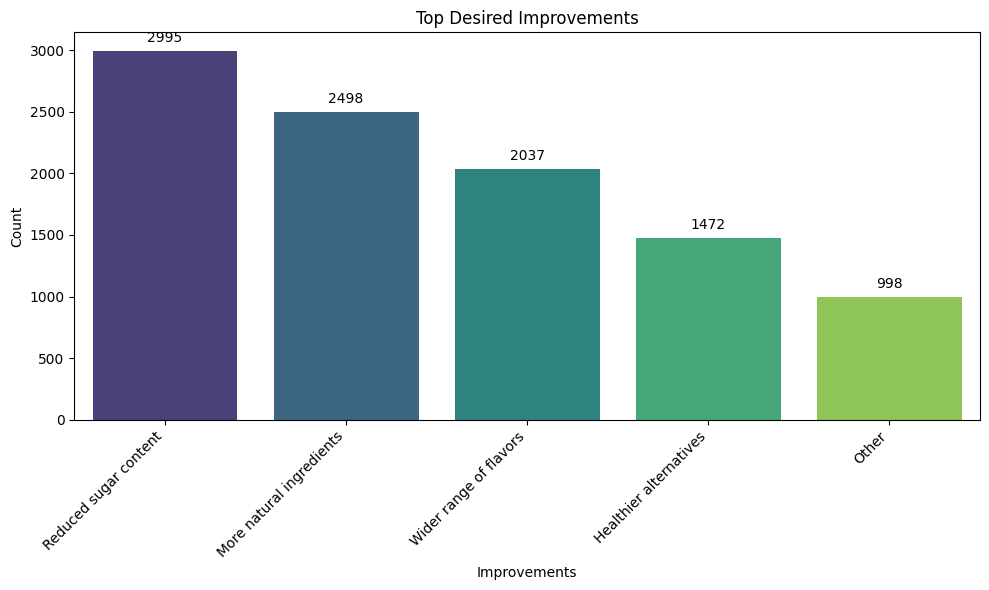

In [63]:
# Calculate the counts of each improvement desired
improvement_counts = survey_responses['Improvements_desired'].value_counts()

# Select the top desired improvements (adjust the number as needed)
top_improvements = improvement_counts.head(5)

# Plotting the top desired improvements with a slightly smaller figure size
plt.figure(figsize=(10, 6))  # Adjust the figsize to your preference (smaller than before)
sns.barplot(x=top_improvements.index, y=top_improvements.values, palette='viridis')

# Annotate the bar plot with count values
for i, count in enumerate(top_improvements.values):
    plt.text(i, count + 50, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Top Desired Improvements')
plt.xlabel('Improvements')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
